In [48]:
import os
import geopandas as gpd

gadm_files = [os.path.join(root, file)
              for root, dirs, files in os.walk("_data/gadm/")
              for file in files if file.startswith("gadm")]

print(gadm_files)

# Select regional level 2 files
gadm_files_level2 = [file for file in gadm_files if "2.shp" in file]
#print(gadm_files_level2)

# Load the shapefiles
shps = [gpd.read_file(shp) for shp in gadm_files_level2]
#print(shps)

['_data/gadm/gadm41_DEU_1.prj', '_data/gadm/gadm41_DEU_0.prj', '_data/gadm/gadm41_DEU_2.prj', '_data/gadm/gadm41_DEU_3.prj', '_data/gadm/gadm41_DEU_4.prj', '_data/gadm/gadm41_DEU_4.dbf', '_data/gadm/gadm41_DEU_3.dbf', '_data/gadm/gadm41_DEU_2.dbf', '_data/gadm/gadm41_DEU_0.dbf', '_data/gadm/gadm41_DEU_1.dbf', '_data/gadm/gadm41_DEU_1.cpg', '_data/gadm/gadm41_DEU_1.shp', '_data/gadm/gadm41_DEU_2.shx', '_data/gadm/gadm41_DEU_3.shx', '_data/gadm/gadm41_DEU_0.shp', '_data/gadm/gadm41_DEU_0.cpg', '_data/gadm/gadm41_DEU_2.cpg', '_data/gadm/gadm41_DEU_2.shp', '_data/gadm/gadm41_DEU_1.shx', '_data/gadm/gadm41_DEU_0.shx', '_data/gadm/gadm41_DEU_3.shp', '_data/gadm/gadm41_DEU_3.cpg', '_data/gadm/gadm41_DEU_4.shx', '_data/gadm/gadm41_DEU_4.cpg', '_data/gadm/gadm41_DEU_4.shp']


<Axes: >

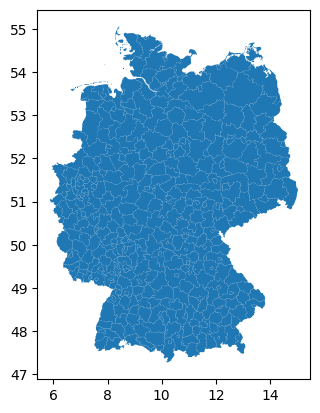

In [49]:
import pandas as pd

germany_shp = gpd.GeoDataFrame(pd.concat(shps, ignore_index=True))
germany_shp.plot()

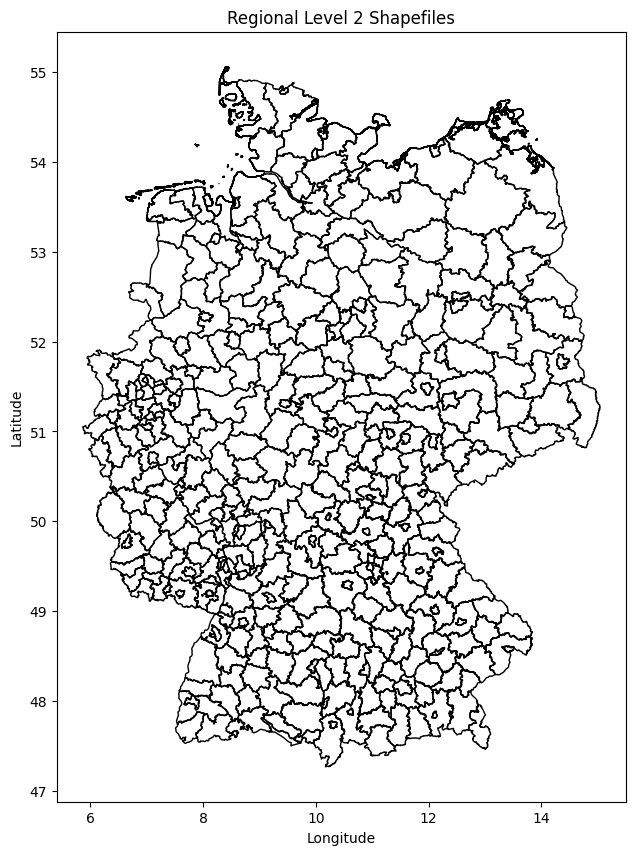

In [50]:
import matplotlib.pyplot as plt

# Plot all shapefiles
fig, ax = plt.subplots(figsize=(10, 10))

germany_shp.plot(ax=ax, edgecolor='k', facecolor='none', linewidth=1)  # No fill color


# Set plot title and labels
ax.set_title('Regional Level 2 Shapefiles')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show plot
plt.show()

In [51]:
germany_shp.head()

,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,DEU.1.1_1,DEU,Germany,DEU.1_1,Baden-Württemberg,NA,Alb-Donau-Kreis,NA,NA,Landkreis,District,08425,DE.BW.AD,"POLYGON ((9.67322 48.17136, 9.6741 48.16991, 9..."
1,DEU.1.2_1,DEU,Germany,DEU.1_1,Baden-Württemberg,NA,Baden-Baden,NA,NA,Stadtkreis,District,08211,DE.BW.BB,"MULTIPOLYGON (((8.11805 48.73807, 8.11372 48.7..."
2,DEU.1.3_1,DEU,Germany,DEU.1_1,Baden-Württemberg,NA,Biberach,NA,NA,Landkreis,District,08426,DE.BW.BR,"POLYGON ((9.75139 47.97439, 9.75106 47.97507, ..."
3,DEU.1.4_1,DEU,Germany,DEU.1_1,Baden-Württemberg,NA,Böblingen,NA,NA,Landkreis,District,08115,DE.BW.BL,"POLYGON ((8.8512 48.53292, 8.85111 48.53247, 8..."
4,DEU.1.5_1,DEU,Germany,DEU.1_1,Baden-Württemberg,NA,Bodensee,NA,NA,Water body,Water body,NA,NA,"POLYGON ((9.04492 47.81646, 9.04539 47.81644, ..."


In [52]:
def assign_detailed_geo_region(name):
    alps = ['Bavaria']
    bavarian_plateau = ['Bavaria']
    black_forest = ['Baden-Württemberg']
    swabian_jura = ['Baden-Württemberg']
    thuringian_forest = ['Thuringia']
    hessian_highlands = ['Hesse']
    
    rhine_plain = ['North Rhine-Westphalia', 'Rhineland-Palatinate', 'Hesse']
    northern_plain = ['Lower Saxony', 'Schleswig-Holstein', 'Mecklenburg-Vorpommern']
    saxon_swiss = ['Saxony']

    if name in alps:
        return 'Alps'
    elif name in bavarian_plateau:
        return 'Bavarian Plateau'
    elif name in black_forest:
        return 'Black Forest'
    elif name in swabian_jura:
        return 'Swabian Jura'
    elif name in thuringian_forest:
        return 'Thuringian Forest'
    elif name in hessian_highlands:
        return 'Hessian Highlands'
    elif name in rhine_plain:
        return 'Rhine Plain'
    elif name in northern_plain:
        return 'Northern Plain'
    elif name in saxon_swiss:
        return 'Saxon Switzerland'
    else:
        return 'Other'

germany_shp['geo_region'] = germany_shp['NAME_1'].apply(assign_detailed_geo_region)


In [53]:
geo_gdf = germany_shp.dissolve(by='geo_region')

In [54]:
geo_gdf = geo_gdf.reset_index()
geo_gdf[['geo_region', 'geometry']].head()

,geo_region,geometry
0,Black Forest,"MULTIPOLYGON (((7.98326 47.55531, 7.98274 47.5..."
1,Northern Plain,"MULTIPOLYGON (((8.6925 54.06153, 8.6925 54.060..."
2,Other,"MULTIPOLYGON (((7.09025 49.15194, 7.08864 49.1..."


## Exersice 2

In [199]:
print(geo_gdf.crs)
geo_gdf_proj = geo_gdf.to_crs(epsg=32632)

EPSG:4326


In [200]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [201]:
geo_gdf['centroid'] = geo_gdf.geometry.centroid
geo_gdf[['geo_region', 'centroid']].head(10)

,geo_region,centroid
0,Black Forest,POINT (9.04909 48.53753)
1,Northern Plain,POINT (11.44781 53.92691)
2,Other,POINT (10.4022 51.00698)


In [202]:
country_union = geo_gdf.geometry.unary_union
print("Country centroid:", country_union.centroid)

Country centroid: POINT (10.394235886469149 51.109895509256916)


## Exercise 3

In [216]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

grdp_df = pd.read_excel('VRP_ reg_04_20_II_ue.xls', header=3)
print(grdp.head())

                    Unnamed: 0  \
0                          NaN   
1                      Україна   
2  Автономна\n Республіка Крим   
3                      області   
4                    Вінницька   

   Валовий регіональний продукт, млн. грн /                                                                                                                                                                                                                                                                                                                                                                                                                 Gross regional product (mln.UAH)  \
0                                             2004.0                                                                                                                                                                                                                                                                       

Підготовка даних

In [217]:
grdp_clean = grdp_df[['Unnamed: 0', 'Unnamed: 91']].copy()

grdp_clean.columns = ['Region', 'GRDP_2021']

grdp_clean = grdp_clean.dropna()

grdp_clean['Region'] = grdp_clean['Region'].str.replace('\n', ' ')

grdp_clean['GRDP_2021'] = pd.to_numeric(grdp_clean['GRDP_2021'], errors='coerce')

grdp_clean = grdp_clean.dropna(subset=['GRDP_2021'])

print("Очищені дані ВРП за 2021 рік:")
print(grdp_clean.head(28))

Очищені дані ВРП за 2021 рік:
               Region  GRDP_2021
1             Україна      104.4
4           Вінницька      106.9
5           Волинська       92.9
6    Дніпропетровська      103.9
7            Донецька      104.2
8         Житомирська      105.7
9        Закарпатська      102.3
10         Запорізька      106.0
11  Івано-Франківська      102.0
12           Київська      101.3
13     Кіровоградська      107.5
14          Луганська      101.8
15          Львівська      107.4
16       Миколаївська      110.1
17            Одеська      106.8
18         Полтавська      101.4
19         Рівненська      102.8
20            Сумська      100.6
21      Тернопільська      107.6
22         Харківська      102.3
23         Херсонська      105.0
24        Хмельницька      106.8
25          Черкаська      106.2
26        Чернівецька      103.7
27       Чернігівська      104.1
28             м.Київ      104.3


In [218]:
ukr_shp = gpd.read_file('_data/gadm/gadm41_UKR_1.shp')
print(ukr_shp[['NAME_1']].head())

       NAME_1
0           ?
1    Cherkasy
2   Chernihiv
3  Chernivtsi
4      Crimea


In [219]:
mapping = {
    'Vinnytsia': 'Вінницька',
    'Volyn': 'Волинська',
    "Dnipropetrovs'k": 'Дніпропетровська',
    "Donets'k": 'Донецька',
    'Zhytomyr': 'Житомирська',
    'Zakarpattia': 'Закарпатська',
    'Zaporizhia': 'Запорізька',
    "Ivano-Frankivs'k": "Івано-Франківська",
    "Kiev": 'Київська',
    "Kiev City": 'м.Київ',
    'Kirovohrad': 'Кіровоградська',
    "Luhans'k": 'Луганська',
    "L'viv": 'Львівська',
    'Mykolaiv': 'Миколаївська',
    'Odessa': 'Одеська',
    'Poltava': 'Полтавська',
    'Rivne': 'Рівненська',
    'Sumy': 'Сумська',
    'Ternopil': 'Тернопільська',
    'Kharkiv': 'Харківська',
    'Kherson': 'Херсонська',
    "Khmel'nyts'kyy": 'Хмельницька',
    'Cherkasy': 'Черкаська',
    'Chernivtsi': 'Чернівецька',
    'Chernihiv': 'Чернігівська',
    "Crimea": 'Крим',
    "Sevastopol'": 'м.Севастополь',
    'Vinnytsya': 'Вінницька',
    'Mykolayiv': 'Миколаївська',
    "Ternopil'": 'Тернопільська',
}

In [220]:
ukr_shp['Region'] = ukr_shp['NAME_1'].map(mapping)

In [221]:
merged = ukr_shp.merge(grdp_clean, on='Region', how='left')

In [222]:
print(merged[['Region', 'GRDP_2021']].head())

         Region  GRDP_2021
0           NaN        NaN
1     Черкаська      106.2
2  Чернігівська      104.1
3   Чернівецька      103.7
4          Крим        NaN


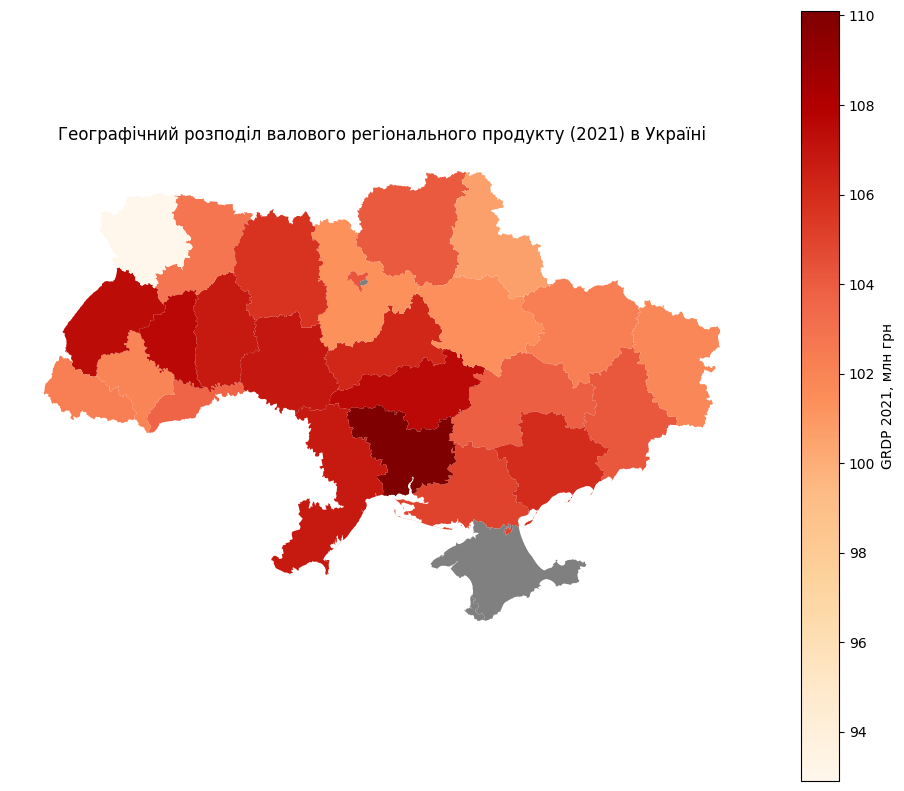

In [223]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged.plot(column='GRDP_2021', cmap='OrRd', legend=True,
            legend_kwds={'label': "GRDP 2021, млн грн"},
            missing_kwds={'color': 'gray', "label": "Немає даних"}, ax=ax)
ax.set_title('Географічний розподіл валового регіонального продукту (2021) в Україні')
ax.axis('off')
plt.show()